In [28]:
import itertools

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def getData(prefix, nlipids):
    helices = ["frame", ("M1","X"), ("M1","Y"), ("M1","Z"), ("M2","X"), ("M2","Y"), ("M2","Z"), ("M3","X"), ("M3","Y"), ("M3","Z"), ("M4","X"), ("M4","Y"), ("M4","Z")]
    lipids = []
    for i in np.arange(nlipids):
        lipids.append((f"L{i}","X"))
        lipids.append((f"L{i}","Y"))
        lipids.append((f"L{i}","Z"))
        
    data = pd.read_csv(f"./CleanData/{prefix}.dat", delim_whitespace=True, names=helices+lipids, index_col=0)
    data.columns = pd.MultiIndex.from_tuples(data.columns)
    
    return data

In [46]:
def plotData(prefix, nlipids, data, ax):
    for i in [1,2,3,4]:
        ax.scatter(data[(f"M{i}","X")], data[(f"M{i}","Y")], label=f"M{i}", s=1)
    for l in np.arange(nlipids):
        try:
            ax.scatter(data[(f"L{l}","X")], data[(f"L{l}","Y")], label=f"{prefix[-1]}_L{l}", s=1)
        except:
            continue

    ax.set_aspect('equal')
    
    return ax

In [121]:
nlipids = 2
prefix = "PROA"
PROA = getData(prefix, nlipids)

nlipids = 2
prefix = "PROB"
PROB = getData(prefix, nlipids)

nlipids = 1
prefix = "PROC"
PROC = getData(prefix, nlipids)

nlipids = 2
prefix = "PROD"
PROD = getData(prefix, nlipids)

nlipids = 2
prefix = "PROE"
PROE = getData(prefix, nlipids)

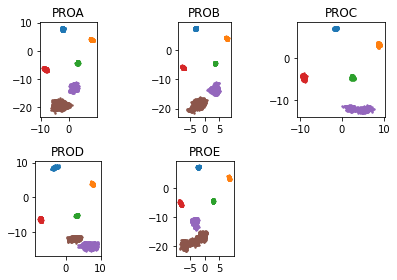

In [122]:
fig, ((PltA, PltB, PltC), (PltD, PltE, extra)) = plt.subplots(2,3)
PltA = plotData("PROA", 2, PROA, PltA)
PltB = plotData("PROB", 2, PROB, PltB)
PltC = plotData("PROC", 1, PROC, PltC)
PltD = plotData("PROD", 2, PROD, PltD)
PltE = plotData("PROE", 2, PROE, PltE)
PltA.title.set_text("PROA")
PltB.title.set_text("PROB")
PltC.title.set_text("PROC")
PltD.title.set_text("PROD")
PltE.title.set_text("PROE")
extra.remove()
fig.tight_layout()
fig.savefig("ShowEach.png", dpi=600)

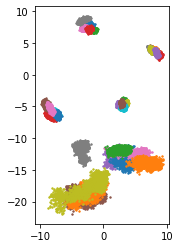

In [123]:
fig, ax = plt.subplots(1,1)
ax = plotData("PROA", 2, PROA, ax)
ax = plotData("PROB", 2, PROB, ax)
ax = plotData("PROC", 1, PROC, ax)
ax = plotData("PROD", 2, PROD, ax)
ax = plotData("PROE", 2, PROE, ax)
fig.savefig("Compare.png", dpi=600)

# All lipids near the protein

In [90]:
nlipids = 30
prefix = "A_all"
PROA = getData(prefix, nlipids).dropna(axis=1)

prefix = "B_all"
PROB = getData(prefix, nlipids).dropna(axis=1)

prefix = "C_all"
PROC = getData(prefix, nlipids).dropna(axis=1)

prefix = "D_all"
PROD = getData(prefix, nlipids).dropna(axis=1)

prefix = "E_all"
PROE = getData(prefix, nlipids).dropna(axis=1)

mers = {"PROA":PROA, "PROB":PROB, "PROC":PROC, "PROD":PROD, "PROE":PROE}

In [91]:
for key, mer in mers.items():
    colMask = list(np.mean(mer.loc[:,(slice(None), 'Z')])>np.mean(mer.loc[:, (['M1', 'M2', 'M3', 'M4'], 'Z')].values))
    colMask[0:4] = [True,True,True,True]

    newMask = []
    for x in colMask:
        newMask.extend(list(itertools.repeat(x, 3)))

    mers[key] = mer.loc[1:50, (newMask, slice(None))]

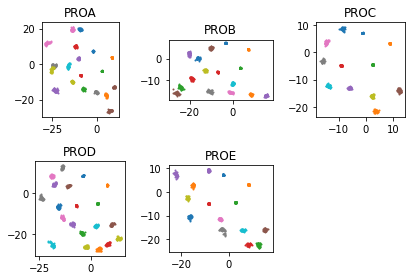

In [92]:
fig, ((PltA, PltB, PltC), (PltD, PltE, extra)) = plt.subplots(2,3)

PltA = plotData("PROA", 29, mers["PROA"], PltA)
PltB = plotData("PROB", 25, mers["PROB"], PltB)
PltC = plotData("PROC", 20, mers["PROC"], PltC)
PltD = plotData("PROD", 28, mers["PROD"], PltD)
PltE = plotData("PROE", 24, mers["PROE"], PltE)
PltA.title.set_text("PROA")
PltB.title.set_text("PROB")
PltC.title.set_text("PROC")
PltD.title.set_text("PROD")
PltE.title.set_text("PROE")
extra.remove()
fig.tight_layout()
fig.savefig("ShowEach_all.png", dpi=600)

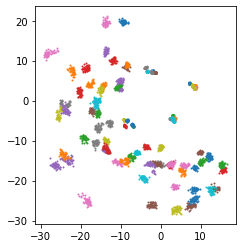

In [93]:
fig, ax = plt.subplots(1,1)

for key, mer in mers.items():
    ax = plotData(key, 29, mer, ax)

fig.savefig("Compare_all.png", dpi=600)

# All glycerols near protein

In [101]:
nlipids = 30
prefix = "A_gly"
PROA = getData(prefix, nlipids).dropna(axis=1)

prefix = "B_gly"
PROB = getData(prefix, nlipids).dropna(axis=1)

prefix = "C_gly"
PROC = getData(prefix, nlipids).dropna(axis=1)

prefix = "D_gly"
PROD = getData(prefix, nlipids).dropna(axis=1)

prefix = "E_gly"
PROE = getData(prefix, nlipids).dropna(axis=1)

mers = {"PROA":PROA, "PROB":PROB, "PROC":PROC, "PROD":PROD, "PROE":PROE}

In [102]:
for key, mer in mers.items():
    colMask = list(np.mean(mer.loc[:,(slice(None), 'Z')])>np.mean(mer.loc[:, (['M1', 'M2', 'M3', 'M4'], 'Z')].values))
    colMask[0:4] = [True,True,True,True]

    newMask = []
    for x in colMask:
        newMask.extend(list(itertools.repeat(x, 3)))

    mers[key] = mer.loc[:, (newMask, slice(None))]

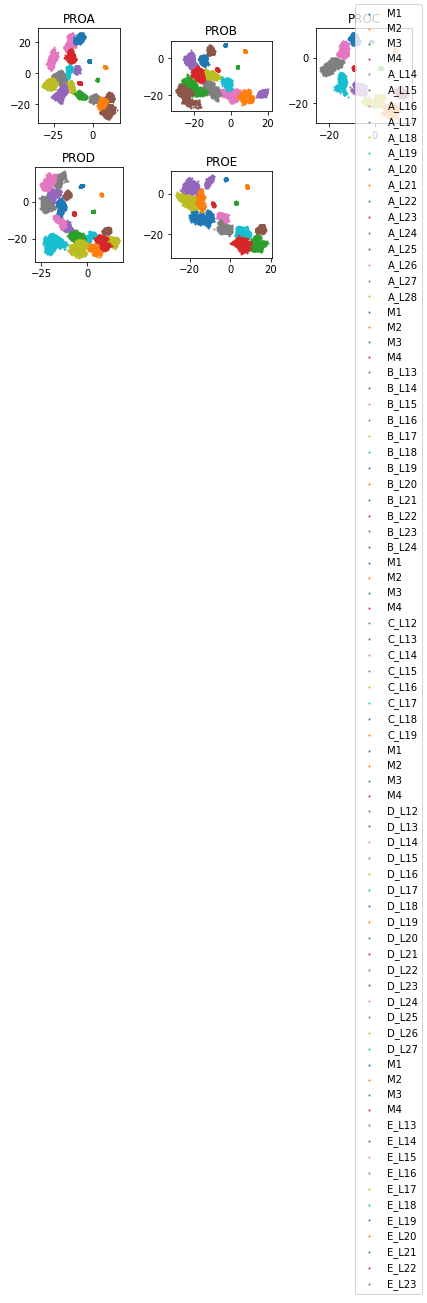

In [105]:
fig, ((PltA, PltB, PltC), (PltD, PltE, extra)) = plt.subplots(2,3)

PltA = plotData("PROA", 29, mers["PROA"], PltA)
PltB = plotData("PROB", 25, mers["PROB"], PltB)
PltC = plotData("PROC", 20, mers["PROC"], PltC)
PltD = plotData("PROD", 28, mers["PROD"], PltD)
PltE = plotData("PROE", 24, mers["PROE"], PltE)
PltA.title.set_text("PROA")
PltB.title.set_text("PROB")
PltC.title.set_text("PROC")
PltD.title.set_text("PROD")
PltE.title.set_text("PROE")
extra.remove()
fig.tight_layout()
fig.legend()
fig.savefig("ShowEach_all_gly.png", dpi=600)

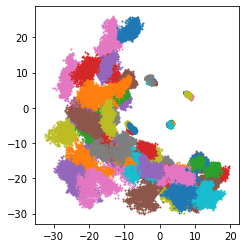

In [104]:
fig, ax = plt.subplots(1,1)

for key, mer in mers.items():
    ax = plotData(key, 29, mer, ax)

fig.savefig("Compare_all_gly.png", dpi=600)